# Neural Networks - Architecture & Parameters

### Introduction

~ 10 mins

- How many layers? (depth)  
- How many units? (width)  
- How are they interconnected? 
- Weights and biases
- Activation function
- Loss function
- Dropout
- Learning rate
- Training batch size
- Training epochs 
- Momentum
- Optimizer
- (...)  
u'U+2610 ToDo: Flesh out...

Finding the ideal architecture & Parameters for a task usually requires a good bit of experimentation!  

A detailed overview of different architecture types can be found here:  
http://www.asimovinstitute.org/neural-network-zoo/

![neuralnetworks.png](./neuralnetworks.png)


# Common Neural Network Types

15 mins


## Feed Forward Neural Network

### Dataset: Fashion-MNIST 


In [5]:
# Import libraries
from keras.datasets import fashion_mnist
from keras import models, layers, utils, callbacks
import numpy as np
import matplotlib.pyplot as plt

# # Set random seed
np.random.seed(0)

Using TensorFlow backend.


In [6]:
# Load data and target vector from Mnist fashion data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Create label dictionary for later

label_names = {
    0 : 'T-shirt/top', 1 : 'Trousers',
    2 : 'Pullover', 3 : 'Dress',
    4 : 'Coat', 5 : 'Sandal',
    6 : 'Shirt', 7 : 'Sneaker',
    8 : 'Bag', 9 : 'Ankle Boot'
}

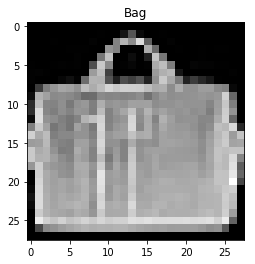

In [7]:
# Look at an example
sample_idx = 81
img = x_test[sample_idx]
class_idx = y_test[sample_idx]

img = img.reshape((28,28))
plt.imshow(img, cmap='gray')
plt.title(label_names[class_idx])
plt.show()

In [8]:
#x_train[sample_idx]
x_train[sample_idx].shape

(28, 28)

In [9]:
# Reshape
input_dim = 784 # 28*28
X_train = x_train.reshape(60000, input_dim) 
X_test = x_test.reshape(10000, input_dim) 
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32') 
X_train /= 255 
X_test /= 255

# Labels to categorical
Y_train = utils.to_categorical(y_train, num_classes=10)
Y_test = utils.to_categorical(y_test, num_classes=10)

In [52]:
# Parameters
p_activation_1 = 'tanh'
p_units_1 = 5
p_optimizer = 'nadam'
p_epochs = 10
# p_units_2 = 30 
# p_activation_2 = 'relu'


all_params = str(p_batch_size) + p_activation_1 + str(p_units_1) + p_optimizer + str(p_epochs) + p_activation_2

In [53]:
# Start neural network
model = models.Sequential()

# Add fully connected layer with a ReLU activation function
model.add(layers.Dense(
    units=p_units_1, 
    activation=p_activation_1, 
    input_shape=(input_dim,), 
    name="dense_one"))

# Add fully connected layer with a sigmoid activation function
model.add(
    layers.Dense(
        units=10, 
        activation='softmax', 
        name="dense_two"))


tb = callbacks.TensorBoard(log_dir='./Graph/' + all_params, histogram_freq=0, write_graph=True, write_images=True)


In [54]:
# Compile neural network model
model.compile(loss='categorical_crossentropy', 
              optimizer=p_optimizer, 
              metrics=['accuracy'])


In [55]:
# Train the model

model.fit(X_train, Y_train, epochs=p_epochs, batch_size=p_batch_size, callbacks=[tb])

Epoch 1/10
60000/60000 [==============================] - 1s 24us/step - loss: 0.9256 - acc: 0.7382
Epoch 2/10
60000/60000 [==============================] - 1s 24us/step - loss: 0.5643 - acc: 0.8198
Epoch 3/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.5086 - acc: 0.8317
Epoch 4/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.4882 - acc: 0.8367
Epoch 5/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.4757 - acc: 0.8387
Epoch 6/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.4675 - acc: 0.8420
Epoch 7/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.4617 - acc: 0.8433
Epoch 8/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.4570 - acc: 0.8444
Epoch 9/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.4537 - acc: 0.8455
Epoch 10/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.4514 - acc: 0.8457

In [18]:
# Evaluate the model
model.evaluate(X_test, Y_test)


10000/10000 [==============================] - 0s 21us/step


[0.35969814462661742, 0.87170000000000003]

In [19]:
print(X_test[sample_idx].reshape(1,784).shape)
X_t = X_test[sample_idx].reshape(1,784)
test_pred = model.predict_classes(X_t)
print("predicting: " + label_names[test_pred[0]])

(1, 784)
predicting: Bag


## Recurrent Neural Network

15 mins

- [ ] ToDo: add description / Graphic / Code exampe

# Parameter Tuning Competition

15 mins

- [] ToDo: Very simple (and fast to train) Example with not very well tuned params.  Ask people to try to improve the parameter values, and submit/shout out Accuracy output

